<a href="https://colab.research.google.com/github/deyem1/Seed-viability-IoT-in-Agric/blob/main/iot_agicultural_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating a DataFrame

In [ ]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
farm_df = pd.read_csv('Crop_recommendation.csv') #reading the csv file
#Dataset was gotten from kaggle at https://www.kaggle.com/datasets/78c7595cbf5a98a8cc488e5b9f6911f216680e5a221e6704ba7be4d7ef42c753

In [ ]:
farm_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
farm_df.info() # checking general info such as datatype, rows, missing values, column names, shape, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
farm_df.describe() # checking statistical summary of the dataset

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
farm_df.isnull().sum() #checking for all missing values
# There are no missing values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Exploratory Data Analysis (EDA)

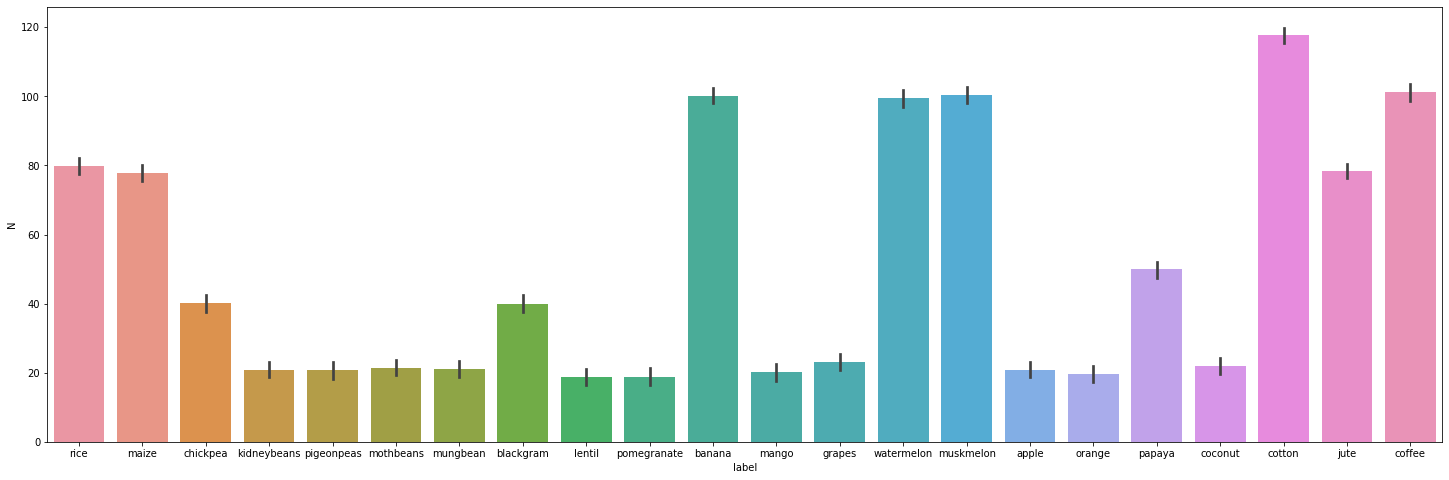

In [ ]:
#barplot of the dataframe of label vs Nitrogen
plt.figure(figsize=(25,8))
sns.barplot(x=farm_df['label'], y=farm_df['N'] )

In [ ]:
dflabel = farm_df.groupby('label').mean() # Grouping table by the label
dflabel

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


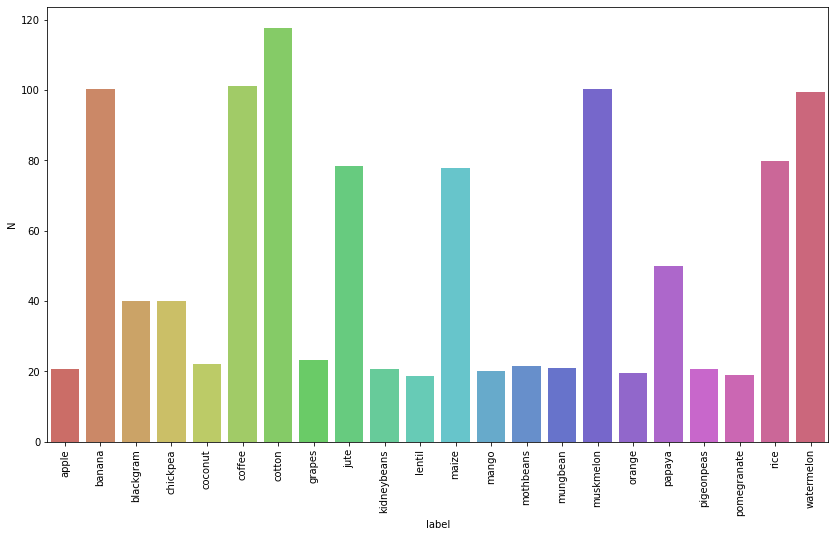

In [ ]:
plt.figure(figsize=(14,8)) #adjusting the chart size

# Bar plot of N vs label
sns.barplot(y = 'N', x = 'label', data=dflabel.reset_index() , palette = 'hls')
plt.xticks(rotation = 90) #rotating the labels
plt.show()

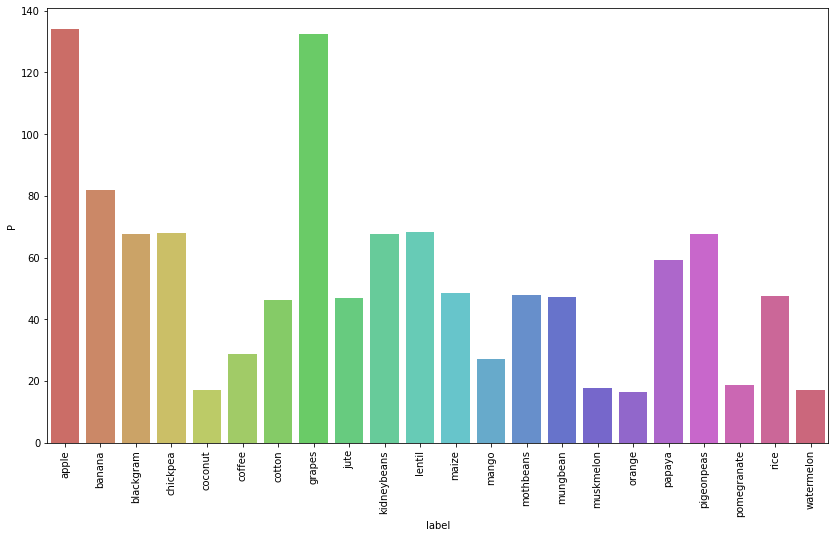

In [ ]:
plt.figure(figsize=(14,8)) #adjusting the chart size

# Bar plot of P vs label
sns.barplot(y = 'P', x = 'label', data=dflabel.reset_index() , palette = 'hls')
plt.xticks(rotation = 90) #rotating the labels
plt.show()

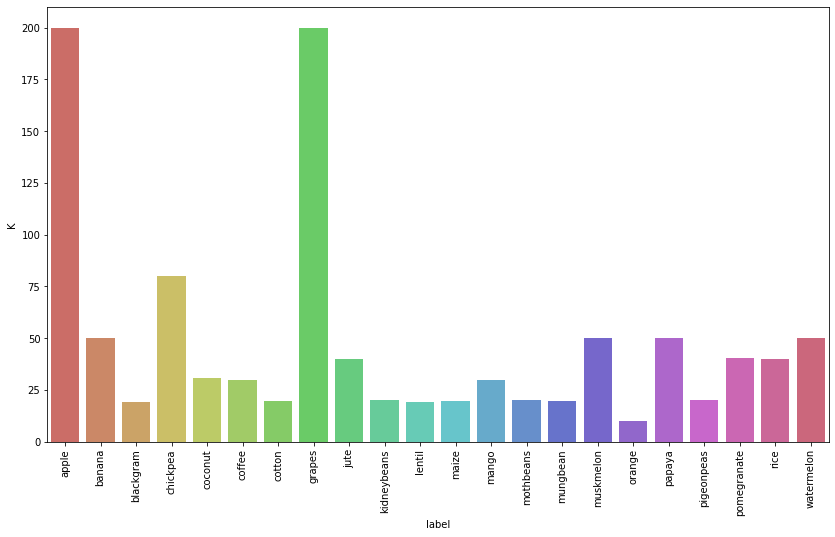

In [ ]:
plt.figure(figsize=(14,8)) #adjusting the chart size

# Bar plot of K vs label
sns.barplot(y = 'K', x = 'label', data=dflabel.reset_index() , palette = 'hls')
plt.xticks(rotation = 90) #rotating the labels
plt.show()

In [ ]:
# The graphs shows the mean value of Nitrogen, phosphorous, Potassium and the effect of its presence on the plants plotted on 'x axis'

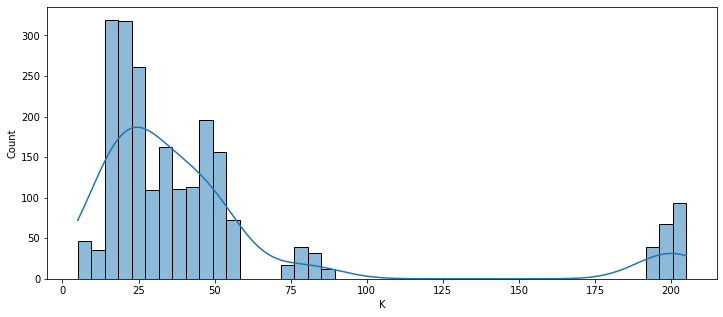

In [ ]:
plt.figure(figsize=(12,5))

# A Histplot of K - Potasium
sns.histplot(data=farm_df , x="K",kde=True )

# Histplot shows the distribution is right-skewed


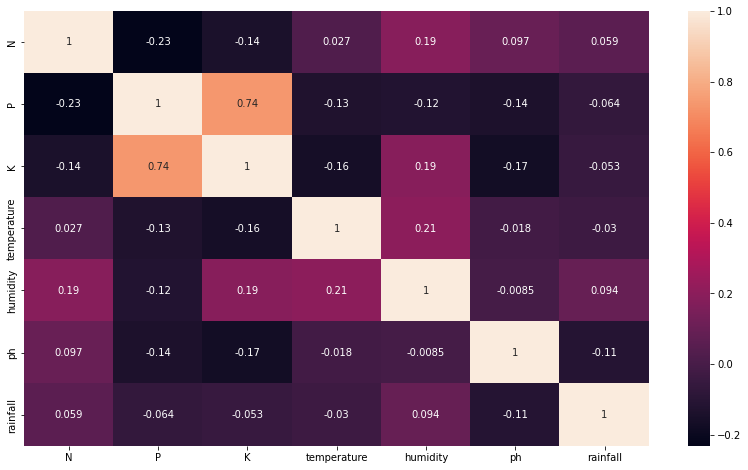

In [ ]:
plt.figure(figsize=(14,8))

# checking the correlation between the columns
sns.heatmap(farm_df.corr(), annot=True)

In [ ]:
farm_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# K and p have a strong positive correlation

# Machine Learning

##  Importing libraries

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
#                                                     shuffle = True, random_state = 0)

## Feature Selection

In [ ]:
Y = farm_df['label']
x = farm_df.iloc[:,:-1]
x


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


## Feature Engineering/Data Transformation

In [ ]:
# encoding labels to numeric
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
y

array([20, 20, 20, ...,  5,  5,  5])

In [ ]:
# checking unique values in labels
farm_df['label'].nunique()

22

In [ ]:
# splitting dataframe into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
# Printing the shape of training data
print("The labels length: ",len(y))
print("The train length: ",len(x))


The labels length:  2200
The train length:  2200


# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as gb
from xgboost import XGBClassifier

In [ ]:
# x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
# print(len(x_train),len(y_train),len(x_test),len(y_test))

In [ ]:
# r_model = RandomForestClassifier()
# # x_model = XGBClassifier()
# t_model = DecisionTreeClassifier()
# c_model = CatBoostClassifier(auto_class_weights= "Balanced")
# l_model = LogisticRegression()


## Model Training

In [ ]:
model_xgboost = XGBClassifier()
model_xgboost.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred_xgboost = model_xgboost.predict(x_test)

# Result and Model Evaluation

In [ ]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        25
           6       0.93      1.00      0.96        13
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        18
          11       1.00      0.96      0.98        27
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        23
          17       1.00    

In [ ]:
# checking if the number of rows of train and test are the same
print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)

print("\nX_test: ", x_test.shape)
print("y_test: ", y_test.shape)


X_train:  (1760, 7)
y_train:  (1760,)

X_test:  (440, 7)
y_test:  (440,)


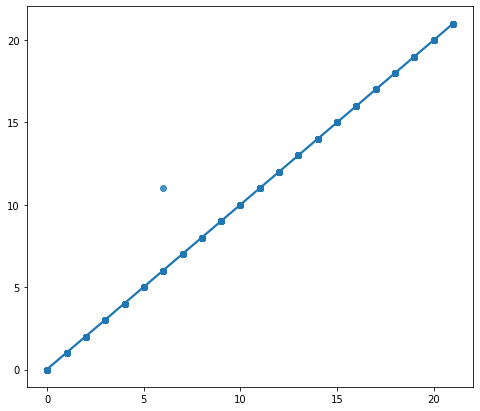

In [ ]:
# evuluating prediction accuracy using regplot
plt.figure(figsize=(8,7))
sns.regplot(x=y_pred_xgboost , y=y_test)


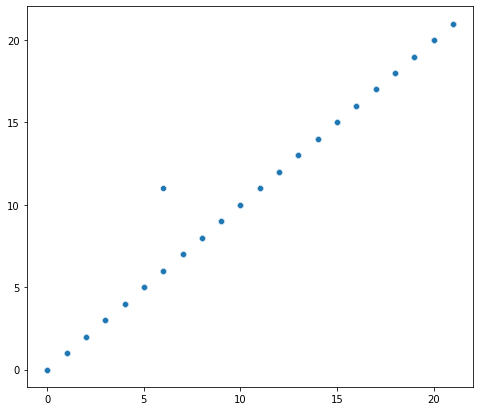

In [ ]:
#evaluating accuracy using scatterplot
plt.figure(figsize=(8,7))
sns.scatterplot(x=y_pred_xgboost, y=y_test)

In [ ]:
y_pred_xgboost

array([ 7, 15,  4,  3, 21, 17, 17, 19, 18,  0,  4, 17, 19, 11,  2,  3,  6,
       15, 13, 19, 15,  3,  5, 19,  2,  8, 16, 21, 20, 16,  0, 13,  8,  8,
        1, 13, 17, 14,  9,  2, 12,  3, 11, 17,  1,  2,  4, 16, 16,  6,  5,
       13, 18, 16, 12, 16, 15, 18, 14, 13,  6,  2,  3,  6, 14, 14,  3, 17,
        4,  1, 20, 11, 19, 21,  1,  9, 17,  0,  7,  3,  3,  1,  0, 11,  0,
       15,  1,  3, 20, 17, 18, 16, 12,  5, 15, 19, 18, 21,  5,  7, 20,  4,
       11, 11, 13,  2, 16, 18, 18, 11, 18, 12, 12, 19, 10,  2, 18, 15,  0,
       10,  4, 15, 10, 11, 12,  5,  6,  2,  5, 18,  2, 11,  4,  5, 16,  4,
       14,  2, 11,  0, 16, 11,  0, 17, 15, 19,  2, 19, 13, 14,  7,  1, 10,
       20, 18,  5, 14, 13, 21,  8, 10,  0, 20, 14, 14, 16,  8,  9, 18, 18,
       15,  7, 11, 12,  9,  3, 21, 19, 10, 10, 21,  7, 17,  5,  0,  4, 21,
       17,  6,  8,  5,  3,  0, 19, 17,  7, 11, 21,  4,  1, 17, 11,  2,  6,
       20, 13,  5,  4, 11, 14, 13, 10,  3,  6, 15, 21, 11, 11,  2, 15, 17,
        0, 16,  5,  0,  6

In [ ]:
print(y_test)

[ 7 15  4  3 21 17 17 19 18  0  4 17 19 11  2  3  6 15 13 19 15  3  5 19
  2  8 16 21 20 16  0 13  8  8  1 13 17 14  9  2 12  3 11 17  1  2  4 16
 16 11  5 13 18 16 12 16 15 18 14 13  6  2  3  6 14 14  3 17  4  1 20 11
 19 21  1  9 17  0  7  3  3  1  0 11  0 15  1  3 20 17 18 16 12  5 15 19
 18 21  5  7 20  4 11 11 13  2 16 18 18 11 18 12 12 19 10  2 18 15  0 10
  4 15 10 11 12  5  6  2  5 18  2 11  4  5 16  4 14  2 11  0 16 11  0 17
 15 19  2 19 13 14  7  1 10 20 18  5 14 13 21  8 10  0 20 14 14 16  8  9
 18 18 15  7 11 12  9  3 21 19 10 10 21  7 17  5  0  4 21 17  6  8  5  3
  0 19 17  7 11 21  4  1 17 11  2  6 20 13  5  4 11 14 13 10  3  6 15 21
 11 11  2 15 17  0 16  5  0  6 20 21 17 16 21  3 21 20  6 14 13 15  2 18
 13 16  0 10  5  8 15  9 21 10 21 16 18 18  4  7 12  9 10  4 19  5  0  7
 15  2 15 20 13 20 13  2 17  8  5  5 12  1  5 13 14 16 18  9 16  8 20 10
  9 11  1  7  2 11 11  0  6 20 21  8  3 11  4 16 20 15 19  7 21 10  1  5
 10  3  5 16  9 21  2  6 10 18 10 12 12  9 13 17  8

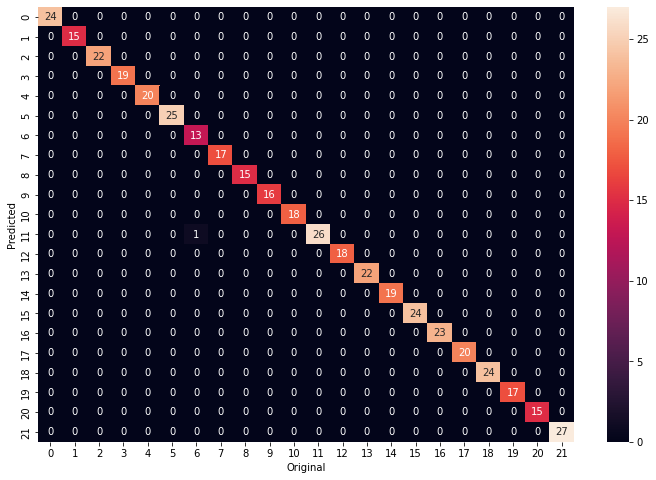

In [ ]:
# Checking correlation between predicted result and actual value
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred_xgboost),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

Returning or decoding encoded data from earlier

In [ ]:
# decoding encoded labels from dataframe
olddf = pd.DataFrame(Y)
decode = pd.DataFrame(olddf['label'].unique())

In [ ]:

newdf = pd.DataFrame(y)
decoded = pd.DataFrame(newdf[0].unique())
ref_df = pd.DataFrame()
ref_df['decode']=decode
ref_df['decoded']=decoded
ref_df

,decode,decoded
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


## Result

In [ ]:
# printing results
result = classification_report(y_test,y_pred_xgboost)

print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        25
           6       0.93      1.00      0.96        13
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        18
          11       1.00      0.96      0.98        27
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        23
          17       1.00    

As seen above, the trained model(Xgboost) has an accuracy of approximately 100%
This can be used to for future predictions on what type of crop to plant,
given the available constraints.
